<h2>Model Evaluation and Refinement</h2>

We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are.

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)
df.to_csv('module_5_auto.csv')

In [2]:
#select the numeric data
df=df._get_numeric_data()

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


 Libraries for plotting 

In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\sara\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<h3>Functions for plotting</h3>

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [11]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1> Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. </p>

In [13]:
y_data = df['price']
#drop price data in x data
x_data=df.drop('price',axis=1)

In [14]:
#we randomly split our data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
#create a Linear Regression object
lre=LinearRegression()
#fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)
#Calculate the R^2 on the test data
r_squared=lre.score(x_test[['horsepower']], y_test)
print('R-squared:',r_squared)


R-squared: 0.707688374146705


In [17]:
#we can get R-squared on x_train and compare with x_test
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

<p>find R^2 on the test data using 70% of the data for training data</p>

In [19]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)
#fit the model using the feature horsepower
lre.fit(x1_train[['horsepower']], y1_train)
#Calculate the R^2 on the test data
r_squared=lre.score(x1_test[['horsepower']], y1_test)
print('R-squared:',r_squared)

R-squared: 0.6287485044222196


Sometimes we do not have sufficient testing data; as a result, we may want to perform Cross-validation

<h3>Cross-validation Score</h3>

in cross validation all train data spilit to folds, every time one fold is consider for test and remain folds are consider for train the model, this routine ends up until all folds are used for train and test,in every time we have a score, at the end we can avarege the scores as final score for model

In [21]:
from sklearn.model_selection import cross_val_score
lre=LinearRegression()
#The parameter 'cv' determines the number of folds
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [22]:
#we have 4 folds , so we will have 4 score 
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [23]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


<p>we can obtain prediction </p>

In [24]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1> Overfitting, Underfitting and Model Selection</h1>

<p> in Overfitting model does extremely track data points but performs poorly at estimating the function, in other words model fits the noise rather than the function</p>
<p>it happens most when we use a multiple linear function or a polynomial function</p>

<p><b> Overfitting for Multiple linear regression</b></p>

In [25]:
#create Multiple linear regression objects and train the model using 'horsepower',
#'curb-weight', 'engine-size' and 'highway-mpg' as features.
lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [29]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

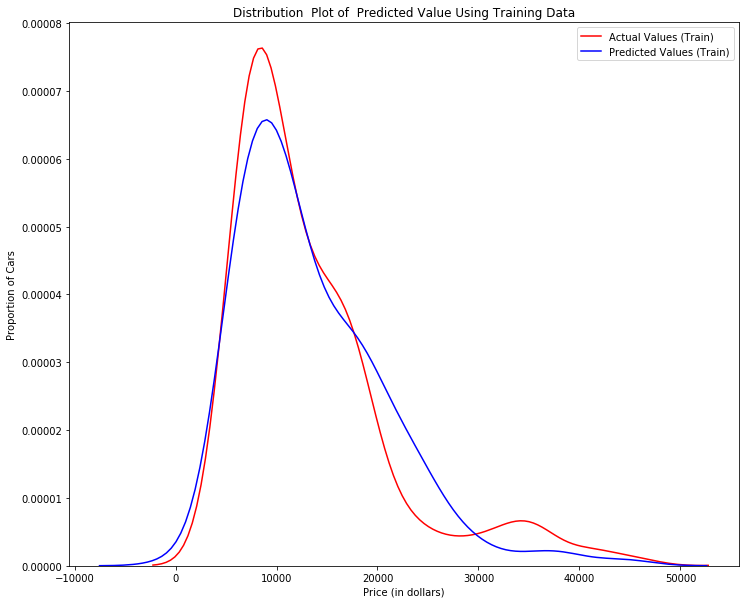

In [32]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? 

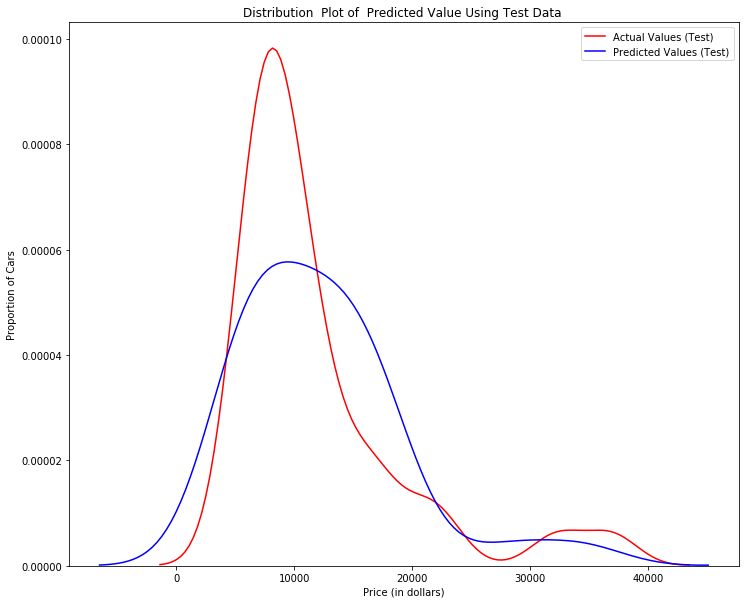

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data '
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

the ranges from 5000 to 15000 the distribution shape is exceptionally different.this is overfitting

<p><b> Overfitting for Polynomial function with one feature</b></p>

In [37]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
#a degree 5 polynomial transformation on the feature 'horse power'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
#create a linear regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
#R^2 of the test data
poly.score(x_test_pr, y_test)

-29.87141885918752

In [40]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902635091

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

In [38]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

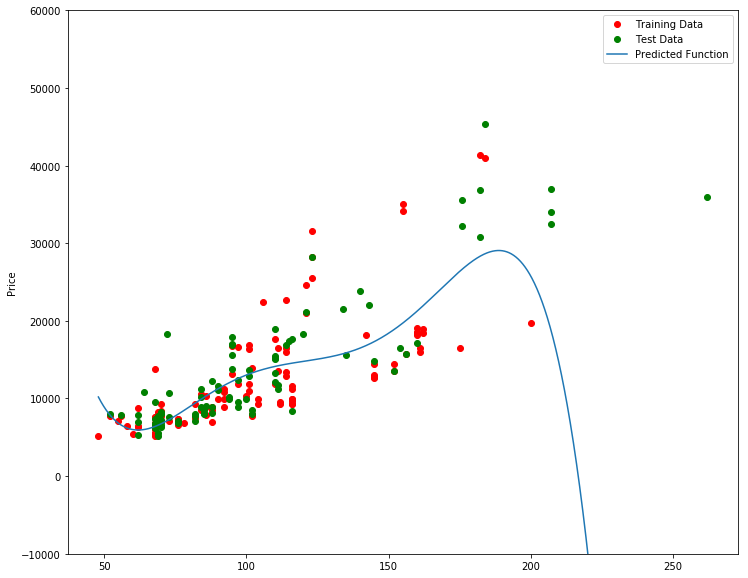

In [41]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

see how the R^2 changes on the test data for different order polynomials and plot the results

Text(3, 0.75, 'Maximum R^2 ')

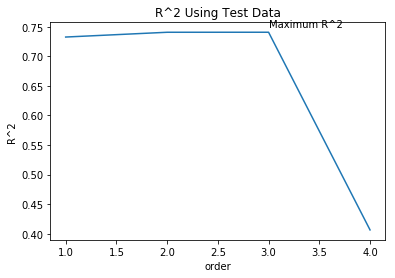

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2  increases until an order three polynomial is used. Then the R^2 decreases at four.

<p><b> Overfitting for Polynomial function with multi features</b></p>

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr1=PolynomialFeatures(degree=2)

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
yhat_test1=poly1.predict(x_test_pr1)

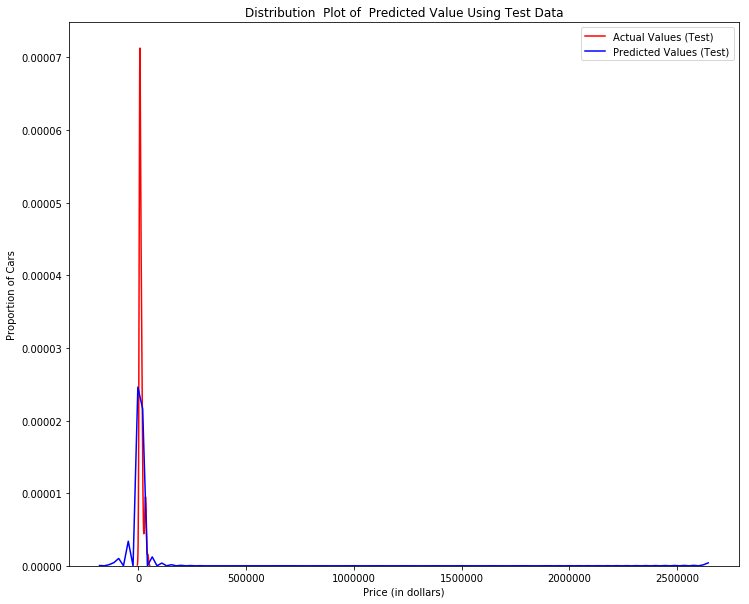

In [49]:
Title='Distribution  Plot of  Predicted Value Using Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<h2>  Ridge regression</h2> 

Ridge regression controls the magnitude of  polynomial coefficients by introducing parameter alpha.in ridge regression we use validation data instead of test data.we train data with different alphas.

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 
                                     'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size',
                                   'highway-mpg','normalized-losses','symboling']])
from sklearn.linear_model import Ridge
#create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=0.1)
#fit the model 
RigeModel.fit(x_train_pr, y_train)

C:\Users\sara\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
yhat = RigeModel.predict(x_test_pr)

compare the first five predicted samples to our test set

In [53]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


select the value of Alfa that minimizes the test error


In [54]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

plot out the value of R^2 for different Alphas

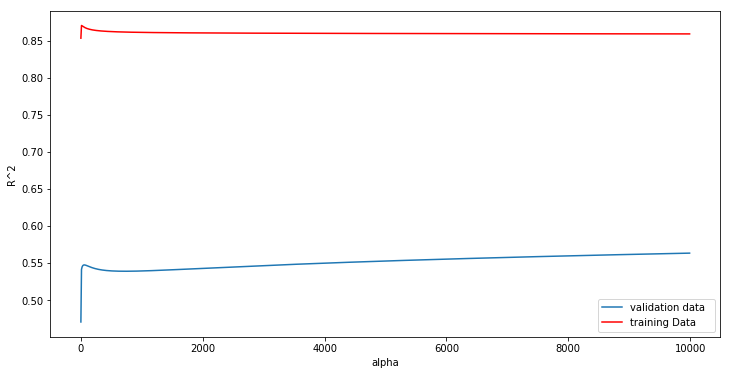

In [57]:
width = 12
height = 6
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line in  represents the R^2 of the training data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the training data. The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 increases.

<h3>  Grid Search</h3>

 sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter(alpha) 

In [59]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\sara\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

finds the best parameter values on the validation data
We can obtain the estimator with the best parameters

In [60]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

We now test our model on the test data

In [61]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149